In [104]:
import pandas as pd
import matplotlib.pyplot as plt

weather = pd.read_csv("F:/karachi data.csv", index_col="DATE")

In [105]:
weather.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
DATE,,,,,,,,,,,,,
2-Jan-80,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.0,",,S",59,"H,,S",72.0,",,S",46.0,",,S"
3-Jan-80,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.0,",,S",60,"H,,S",72.0,",,S",45.0,",,S"
4-Jan-80,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.0,",,S",60,"H,,S",72.0,",,S",46.0,",,S"
5-Jan-80,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.0,",,S",57,"H,,S",72.0,",,S",NaN,NaN
6-Jan-80,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.0,",,S",59,"H,,S",73.0,",,S",45.0,",,S"


In [106]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]

In [107]:
weather.apply(pd.isnull).sum()

STATION               0
NAME                  0
LATITUDE              0
LONGITUDE             0
ELEVATION             0
PRCP               3468
PRCP_ATTRIBUTES    3468
TAVG                  0
TAVG_ATTRIBUTES       0
TMAX               5809
TMAX_ATTRIBUTES    5809
TMIN               7561
TMIN_ATTRIBUTES    7561
dtype: int64

In [108]:
valid_columns = weather.columns[null_pct < 0.5]

In [109]:
valid_columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'PRCP',
       'PRCP_ATTRIBUTES', 'TAVG', 'TAVG_ATTRIBUTES', 'TMAX',
       'TMAX_ATTRIBUTES'],
      dtype='object')

In [110]:
weather = weather[valid_columns].copy()

In [111]:
weather.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'PRCP',
       'PRCP_ATTRIBUTES', 'TAVG', 'TAVG_ATTRIBUTES', 'TMAX',
       'TMAX_ATTRIBUTES'],
      dtype='object')

In [112]:
weather = weather.ffill()

In [113]:
weather.apply(pd.isnull).sum()

STATION            0
NAME               0
LATITUDE           0
LONGITUDE          0
ELEVATION          0
PRCP               0
PRCP_ATTRIBUTES    0
TAVG               0
TAVG_ATTRIBUTES    0
TMAX               0
TMAX_ATTRIBUTES    0
dtype: int64

In [114]:
weather

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES
DATE,,,,,,,,,,,
2-Jan-80,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.0,",,S",59,"H,,S",72.0,",,S"
3-Jan-80,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.0,",,S",60,"H,,S",72.0,",,S"
4-Jan-80,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.0,",,S",60,"H,,S",72.0,",,S"
5-Jan-80,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.0,",,S",57,"H,,S",72.0,",,S"
6-Jan-80,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.0,",,S",59,"H,,S",73.0,",,S"
...,...,...,...,...,...,...,...,...,...,...,...
14-Jul-23,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.0,",,S",88,"H,,S",93.0,",,S"
15-Jul-23,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.0,",,S",88,"H,,S",92.0,",,S"
16-Jul-23,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.0,"B,,S",86,"H,,S",90.0,",,S"


In [115]:
weather.dtypes

STATION             object
NAME                object
LATITUDE           float64
LONGITUDE          float64
ELEVATION          float64
PRCP               float64
PRCP_ATTRIBUTES     object
TAVG                 int64
TAVG_ATTRIBUTES     object
TMAX               float64
TMAX_ATTRIBUTES     object
dtype: object

In [116]:
weather.index = pd.to_datetime(weather.index)

In [117]:
weather.index

DatetimeIndex(['1980-01-02', '1980-01-03', '1980-01-04', '1980-01-05',
               '1980-01-06', '1980-01-07', '1980-01-08', '1980-01-10',
               '1980-01-11', '1980-01-12',
               ...
               '2023-07-09', '2023-07-10', '2023-07-11', '2023-07-12',
               '2023-07-13', '2023-07-14', '2023-07-15', '2023-07-16',
               '2023-07-17', '2023-07-18'],
              dtype='datetime64[ns]', name='DATE', length=14866, freq=None)

In [118]:
weather.index.year

Int64Index([1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980,
            ...
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', name='DATE', length=14866)

In [119]:
weather.index.year.value_counts().sort_index()

1980    350
1981    352
1982    321
1983    348
1984    339
1985    354
1986    342
1987    273
1988    218
1989    294
1990    326
1991    319
1992    343
1993    361
1994    365
1995    365
1996    365
1997    361
1998    363
1999    339
2000    308
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    364
2010    365
2011    365
2012    366
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    361
2022    361
2023    199
Name: DATE, dtype: int64

<Axes: xlabel='DATE'>

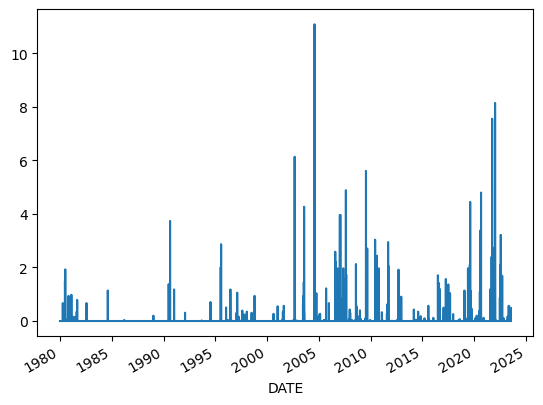

In [120]:
weather["PRCP"].plot()

In [121]:
weather["target"] = weather.shift(-1)["TMAX"]

In [122]:
weather

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,target
DATE,,,,,,,,,,,,
1980-01-02,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.0,",,S",59,"H,,S",72.0,",,S",72.0
1980-01-03,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.0,",,S",60,"H,,S",72.0,",,S",72.0
1980-01-04,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.0,",,S",60,"H,,S",72.0,",,S",72.0
1980-01-05,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.0,",,S",57,"H,,S",72.0,",,S",73.0
1980-01-06,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.0,",,S",59,"H,,S",73.0,",,S",75.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-14,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.0,",,S",88,"H,,S",93.0,",,S",92.0
2023-07-15,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.0,",,S",88,"H,,S",92.0,",,S",90.0
2023-07-16,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.0,"B,,S",86,"H,,S",90.0,",,S",95.0


In [123]:
weather = weather.ffill()

In [124]:
weather

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,target
DATE,,,,,,,,,,,,
1980-01-02,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.0,",,S",59,"H,,S",72.0,",,S",72.0
1980-01-03,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.0,",,S",60,"H,,S",72.0,",,S",72.0
1980-01-04,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.0,",,S",60,"H,,S",72.0,",,S",72.0
1980-01-05,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.0,",,S",57,"H,,S",72.0,",,S",73.0
1980-01-06,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.0,",,S",59,"H,,S",73.0,",,S",75.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-14,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.0,",,S",88,"H,,S",93.0,",,S",92.0
2023-07-15,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.0,",,S",88,"H,,S",92.0,",,S",90.0
2023-07-16,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.0,"B,,S",86,"H,,S",90.0,",,S",95.0


In [125]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

In [126]:
weather.fillna(0, inplace=True)

In [127]:
correlation_matrix = weather.corr()

C:\Users\Net PC\AppData\Local\Temp\ipykernel_3604\1715056040.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = weather.corr()


In [128]:
print(correlation_matrix)

           LATITUDE  LONGITUDE  ELEVATION      PRCP      TAVG      TMAX  \
LATITUDE        NaN        NaN        NaN       NaN       NaN       NaN   
LONGITUDE       NaN        NaN        NaN       NaN       NaN       NaN   
ELEVATION       NaN        NaN        NaN       NaN       NaN       NaN   
PRCP            NaN        NaN        NaN  1.000000 -0.033497 -0.048525   
TAVG            NaN        NaN        NaN -0.033497  1.000000  0.755700   
TMAX            NaN        NaN        NaN -0.048525  0.755700  1.000000   
target          NaN        NaN        NaN -0.047494  0.740477  0.922537   

             target  
LATITUDE        NaN  
LONGITUDE       NaN  
ELEVATION       NaN  
PRCP      -0.047494  
TAVG       0.740477  
TMAX       0.922537  
target     1.000000  


In [129]:
predictors = weather.columns[~weather.columns.isin(["target", "NAME", "STATION"])]

In [130]:
predictors

Index(['LATITUDE', 'LONGITUDE', 'ELEVATION', 'PRCP', 'PRCP_ATTRIBUTES', 'TAVG',
       'TAVG_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES'],
      dtype='object')

In [131]:
weather_cleaned = weather.dropna(axis=1)

In [132]:
print(weather_cleaned)

                STATION                      NAME  LATITUDE  LONGITUDE  \
DATE                                                                     
1980-01-02  PKM00041780  JINNAH INTERNATIONAL, PK    24.907     67.161   
1980-01-03  PKM00041780  JINNAH INTERNATIONAL, PK    24.907     67.161   
1980-01-04  PKM00041780  JINNAH INTERNATIONAL, PK    24.907     67.161   
1980-01-05  PKM00041780  JINNAH INTERNATIONAL, PK    24.907     67.161   
1980-01-06  PKM00041780  JINNAH INTERNATIONAL, PK    24.907     67.161   
...                 ...                       ...       ...        ...   
2023-07-14  PKM00041780  JINNAH INTERNATIONAL, PK    24.907     67.161   
2023-07-15  PKM00041780  JINNAH INTERNATIONAL, PK    24.907     67.161   
2023-07-16  PKM00041780  JINNAH INTERNATIONAL, PK    24.907     67.161   
2023-07-17  PKM00041780  JINNAH INTERNATIONAL, PK    24.907     67.161   
2023-07-18  PKM00041780  JINNAH INTERNATIONAL, PK    24.907     67.161   

            ELEVATION  PRCP PRCP_ATTR

In [133]:
from sklearn.ensemble import RandomForestRegressor
rr = RandomForestRegressor()

In [134]:
def backtest(weather, model, predictors, target_col="temperature", start=3650, step=90):
    all_predictions = []

    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i, :]
        test = weather.iloc[i:(i+step), :]

        # Ensure target column is present in the DataFrame
        if target_col not in train.columns:
            raise ValueError(f"Column '{target_col}' not found in the DataFrame.")

        # Drop non-numeric columns from input features
        train_numeric = train[predictors].select_dtypes(include='number')
        test_numeric = test[predictors].select_dtypes(include='number')

        model.fit(train_numeric, train[target_col])

        preds = model.predict(test_numeric)

        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test[target_col], preds], axis=1)

        combined.columns = ["actual", "prediction"]

        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()

        all_predictions.append(combined)

    return pd.concat(all_predictions, axis=0)


In [135]:
weather.columns = weather.columns.str.strip()


In [136]:
print(weather.columns)


Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'PRCP',
       'PRCP_ATTRIBUTES', 'TAVG', 'TAVG_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES',
       'target'],
      dtype='object')


In [137]:
print(weather.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14866 entries, 1980-01-02 to 2023-07-18
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          14866 non-null  object 
 1   NAME             14866 non-null  object 
 2   LATITUDE         14866 non-null  float64
 3   LONGITUDE        14866 non-null  float64
 4   ELEVATION        14866 non-null  float64
 5   PRCP             14866 non-null  float64
 6   PRCP_ATTRIBUTES  14866 non-null  object 
 7   TAVG             14866 non-null  int64  
 8   TAVG_ATTRIBUTES  14866 non-null  object 
 9   TMAX             14866 non-null  float64
 10  TMAX_ATTRIBUTES  14866 non-null  object 
 11  target           14866 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB
None


In [138]:
predictions = backtest(weather, rr, predictors, target_col="target")  # Replace "target" with the correct column name

In [139]:
predictions

,actual,prediction,diff
DATE,,,
1991-05-31,99.0,96.120167,2.879833
1991-06-01,99.0,97.630633,1.369367
1991-06-02,99.0,98.632367,0.367633
1991-06-03,98.0,95.779256,2.220744
1991-06-04,100.0,96.770927,3.229073
...,...,...,...
2023-07-14,92.0,93.629953,1.629953
2023-07-15,90.0,93.554676,3.554676
2023-07-16,95.0,91.312443,3.687557


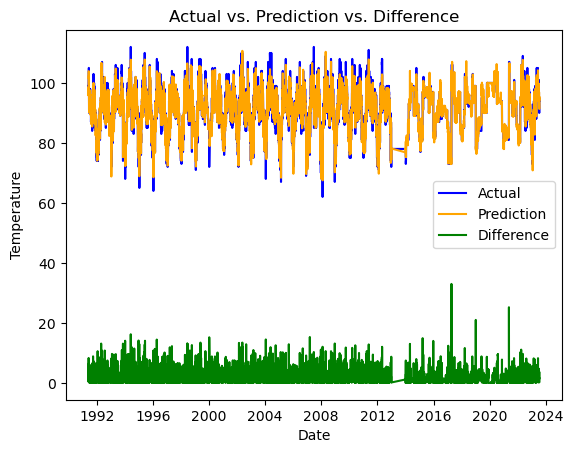

In [140]:
plt.plot(predictions.index, predictions['actual'], label='Actual', color='blue')

# Plot the predicted values
plt.plot(predictions.index, predictions['prediction'], label='Prediction', color='orange')

# Plot the difference values
plt.plot(predictions.index, predictions['diff'], label='Difference', color='green')

# Add labels and title to the plot
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Actual vs. Prediction vs. Difference')

# Add a legend to distinguish between lines
plt.legend()

# Display the plot
plt.show()

In [141]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions["actual"], predictions["prediction"])

1.8091208096851177

In [162]:
predictions["diff"].mean()

1.8091208096851177

In [195]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather

rolling_horizons = [3, 14]

for horizon in rolling_horizons:
    for col in ["TMAX", "TMIN", "PRCP"]:
        if col in weather.columns:
            weather = compute_rolling(weather, horizon, col)

In [164]:
weather

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,...,rolling_3_PRCP,rolling_3_PRCP_pct,rolling_14_TMAX,rolling_14_TMAX_pct,rolling_14_PRCP,rolling_14_PRCP_pct,month_avg_TMAX,month_avg_PRCP,day_avg_TMAX,day_avg_PRCP
DATE,,,,,,,,,,,,,,,,,,,,,
1980-04-09,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.67,",,S",86,"H,,S",97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,97.428571,0.095714,97.000000,0.670000
1980-04-10,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.00,",,S",84,"H,,S",95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,97.125000,0.083750,95.000000,0.000000
1980-04-11,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.00,",,S",86,"H,,S",99.0,...,0.223333,-1.000000,NaN,NaN,NaN,NaN,97.333333,0.074444,99.000000,0.000000
1980-06-24,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,1.50,",,S",83,"H,,S",109.0,...,0.500000,2.000000,NaN,NaN,NaN,NaN,96.166667,0.062500,109.000000,1.500000
1980-06-25,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.00,",,S",86,"H,,S",97.0,...,0.500000,-1.000000,NaN,NaN,NaN,NaN,96.200000,0.060000,97.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-07,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.04,",,S",91,"H,,S",101.0,...,0.013333,2.000000,92.785714,0.088530,0.065000,-0.384615,92.900324,0.069878,95.075000,0.018500
2023-07-08,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.04,",,S",88,"H,,S",96.0,...,0.026667,0.500000,93.357143,0.028309,0.067857,-0.410526,92.902834,0.069854,93.790698,0.073953
2023-07-09,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.50,",,S",90,"H,,S",97.0,...,0.193333,1.586207,93.857143,0.033486,0.103571,3.827586,92.906149,0.070202,93.166667,0.110952


In [165]:
weather = weather.iloc[14:,:]

In [166]:
weather

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,...,rolling_3_PRCP,rolling_3_PRCP_pct,rolling_14_TMAX,rolling_14_TMAX_pct,rolling_14_PRCP,rolling_14_PRCP_pct,month_avg_TMAX,month_avg_PRCP,day_avg_TMAX,day_avg_PRCP
DATE,,,,,,,,,,,,,,,,,,,,,
1980-07-07,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.00,",,S",86,"H,,S",91.0,...,0.643333,-1.000000,95.500000,-0.047120,0.265714,-1.000000,94.000000,0.292857,91.000000,0.000000
1980-10-29,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.94,",,S",76,"H,,S",88.0,...,0.313333,2.000000,95.000000,-0.073684,0.332857,1.824034,94.750000,0.033571,88.000000,0.940000
1980-10-30,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.00,",,S",77,"H,,S",88.0,...,0.313333,-1.000000,94.214286,-0.065959,0.332857,-1.000000,94.517241,0.032414,88.000000,0.000000
1980-10-31,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.00,",,S",71,"H,,S",81.0,...,0.313333,-1.000000,92.214286,-0.121611,0.225714,-1.000000,94.066667,0.031333,81.000000,0.000000
1980-12-10,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.04,",,S",67,"H,,S",84.0,...,0.013333,2.000000,91.285714,-0.079812,0.228571,-0.825000,82.800000,0.004000,84.000000,0.040000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-07,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.04,",,S",91,"H,,S",101.0,...,0.013333,2.000000,92.785714,0.088530,0.065000,-0.384615,92.900324,0.069878,95.075000,0.018500
2023-07-08,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.04,",,S",88,"H,,S",96.0,...,0.026667,0.500000,93.357143,0.028309,0.067857,-0.410526,92.902834,0.069854,93.790698,0.073953
2023-07-09,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.50,",,S",90,"H,,S",97.0,...,0.193333,1.586207,93.857143,0.033486,0.103571,3.827586,92.906149,0.070202,93.166667,0.110952


In [167]:
weather.index = pd.to_datetime(weather.index)

In [178]:
def expand_mean(series):
    return series.expanding().mean()

# Calculate expanding mean values for columns 'TMAX', 'TMIN', and 'PRCP' based on month
for col in ["TMAX", "TMIN", "PRCP"]:
    if col in weather.columns:
        month_avg = weather.groupby(weather.index.month, group_keys=False)[col].apply(expand_mean)
        weather = pd.merge(weather, month_avg.rename(f"month_avg_{col}"), left_index=True, right_index=True, how='left')

# Calculate expanding mean values for columns 'TMAX', 'TMIN', and 'PRCP' based on day of the year
for col in ["TMAX", "TMIN", "PRCP"]:
    if col in weather.columns:
        day_avg = weather.groupby(weather.index.day_of_year, group_keys=False)[col].apply(expand_mean)
        weather = pd.merge(weather, day_avg.rename(f"day_avg_{col}"), left_index=True, right_index=True, how='left')

# Fill any NaN values with 0
weather_filled = weather.fillna(0)

In [179]:
weather

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,...,day_avg_TMAX_x,day_avg_PRCP_x,month_avg_TMAX_y,month_avg_PRCP_y,day_avg_TMAX_y,day_avg_PRCP_y,month_avg_TMAX,month_avg_PRCP,day_avg_TMAX,day_avg_PRCP
DATE,,,,,,,,,,,,,,,,,,,,,
1980-07-07,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.00,",,S",86,"H,,S",91.0,...,91.000000,0.000000,91.000000,0.000000,91.000000,0.000000,91.000000,0.000000,91.000000,0.000000
1980-10-29,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.94,",,S",76,"H,,S",88.0,...,88.000000,0.940000,88.000000,0.940000,88.000000,0.940000,88.000000,0.940000,88.000000,0.940000
1980-10-30,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.00,",,S",77,"H,,S",88.0,...,88.000000,0.000000,88.000000,0.470000,88.000000,0.000000,88.000000,0.470000,88.000000,0.000000
1980-10-31,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.00,",,S",71,"H,,S",81.0,...,81.000000,0.000000,85.666667,0.313333,81.000000,0.000000,85.666667,0.313333,81.000000,0.000000
1980-12-10,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.04,",,S",67,"H,,S",84.0,...,84.000000,0.040000,84.000000,0.040000,84.000000,0.040000,84.000000,0.040000,84.000000,0.040000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-07,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.04,",,S",91,"H,,S",101.0,...,95.428571,0.105714,92.473896,0.338072,95.428571,0.105714,92.473896,0.338072,95.428571,0.105714
2023-07-08,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.04,",,S",88,"H,,S",96.0,...,93.750000,0.397500,92.488000,0.336880,93.750000,0.397500,92.488000,0.336880,93.750000,0.397500
2023-07-09,PKM00041780,"JINNAH INTERNATIONAL, PK",24.907,67.161,30.5,0.50,",,S",90,"H,,S",97.0,...,93.111111,0.517778,92.505976,0.337530,93.111111,0.517778,92.505976,0.337530,93.111111,0.517778


In [180]:
predictors = weather.columns[~weather.columns.isin(["target", "NAME", "STATION"])]

In [181]:
print(weather.isnull().sum())


STATION                0
NAME                   0
LATITUDE               0
LONGITUDE              0
ELEVATION              0
PRCP                   0
PRCP_ATTRIBUTES        0
TAVG                   0
TAVG_ATTRIBUTES        0
TMAX                   0
TMAX_ATTRIBUTES        0
target                 0
rolling_3_TMAX         0
rolling_3_TMAX_pct     0
rolling_3_PRCP         0
rolling_3_PRCP_pct     0
rolling_14_TMAX        0
rolling_14_TMAX_pct    0
rolling_14_PRCP        0
rolling_14_PRCP_pct    0
month_avg_TMAX_x       0
month_avg_PRCP_x       0
day_avg_TMAX_x         0
day_avg_PRCP_x         0
month_avg_TMAX_y       0
month_avg_PRCP_y       0
day_avg_TMAX_y         0
day_avg_PRCP_y         0
month_avg_TMAX         0
month_avg_PRCP         0
day_avg_TMAX           0
day_avg_PRCP           0
dtype: int64


In [182]:
weather.dropna(inplace=True)


In [183]:
weather.fillna(0, inplace=True)


In [186]:
weather.fillna(weather.mean(numeric_only=True), inplace=True)


In [187]:
predictors

Index(['LATITUDE', 'LONGITUDE', 'ELEVATION', 'PRCP', 'PRCP_ATTRIBUTES', 'TAVG',
       'TAVG_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES', 'rolling_3_TMAX',
       'rolling_3_TMAX_pct', 'rolling_3_PRCP', 'rolling_3_PRCP_pct',
       'rolling_14_TMAX', 'rolling_14_TMAX_pct', 'rolling_14_PRCP',
       'rolling_14_PRCP_pct', 'month_avg_TMAX_x', 'month_avg_PRCP_x',
       'day_avg_TMAX_x', 'day_avg_PRCP_x', 'month_avg_TMAX_y',
       'month_avg_PRCP_y', 'day_avg_TMAX_y', 'day_avg_PRCP_y',
       'month_avg_TMAX', 'month_avg_PRCP', 'day_avg_TMAX', 'day_avg_PRCP'],
      dtype='object')

In [188]:
predictions

,actual,prediction,diff
DATE,,,
1991-05-31,99.0,96.120167,2.879833
1991-06-01,99.0,97.630633,1.369367
1991-06-02,99.0,98.632367,0.367633
1991-06-03,98.0,95.779256,2.220744
1991-06-04,100.0,96.770927,3.229073
...,...,...,...
2023-07-14,92.0,93.629953,1.629953
2023-07-15,90.0,93.554676,3.554676
2023-07-16,95.0,91.312443,3.687557


In [196]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2017-04-12,106.0,73.000000,33.000000
2021-05-17,107.0,81.775333,25.224667
2019-01-05,78.0,99.000000,21.000000
1994-06-05,112.0,95.782355,16.217645
2007-03-10,76.0,91.305727,15.305727
...,...,...,...
2019-12-22,100.0,100.000000,0.000000
2019-12-21,100.0,100.000000,0.000000
2019-12-20,100.0,100.000000,0.000000


In [197]:
weather.loc["1990-03-07":"1990-03-17"]

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,...,day_avg_TMAX_x,day_avg_PRCP_x,month_avg_TMAX_y,month_avg_PRCP_y,day_avg_TMAX_y,day_avg_PRCP_y,month_avg_TMAX,month_avg_PRCP,day_avg_TMAX,day_avg_PRCP
DATE,,,,,,,,,,,,,,,,,,,,,


<Axes: >

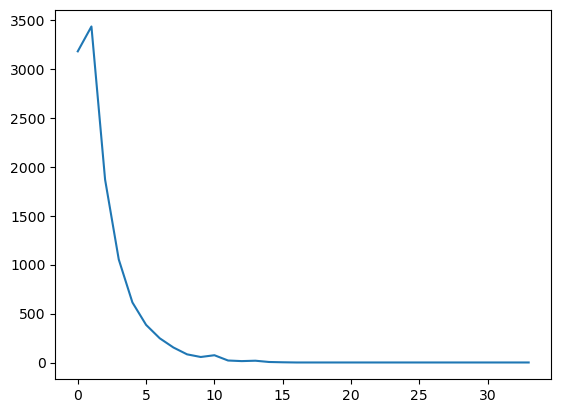

In [191]:
predictions["diff"].round().value_counts().sort_index().plot()

In [192]:
print(weather.columns)

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'PRCP',
       'PRCP_ATTRIBUTES', 'TAVG', 'TAVG_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES',
       'target', 'rolling_3_TMAX', 'rolling_3_TMAX_pct', 'rolling_3_PRCP',
       'rolling_3_PRCP_pct', 'rolling_14_TMAX', 'rolling_14_TMAX_pct',
       'rolling_14_PRCP', 'rolling_14_PRCP_pct', 'month_avg_TMAX_x',
       'month_avg_PRCP_x', 'day_avg_TMAX_x', 'day_avg_PRCP_x',
       'month_avg_TMAX_y', 'month_avg_PRCP_y', 'day_avg_TMAX_y',
       'day_avg_PRCP_y', 'month_avg_TMAX', 'month_avg_PRCP', 'day_avg_TMAX',
       'day_avg_PRCP'],
      dtype='object')
